# Index   

0. [Importing libraries](##Importing-libraries) 


1. [Exploratory Data Analysis](#Exploratory-Data-Analysis)

 [Reading the data set](###Reading-the-data-set)

2. [Data Enginnering](#Dara-Engineering)
 
3. [Model Screening with Pycaret](#Model-screening-with-PycaretModel-Screening)

4. [Tunning Random Forest Hyperparameters with Optuna](##Random-Forest-Hyperparameters-tunning-with-Optuna)

5. [Prediction of test_X](##test_X-prediction)


1. Import Needed Modules
2. Read in images and create a dataframe of image paths and class labels
3. Trim the train_df dataframe
4. Balance the train_df dataframe
5. Create train, test and validation generators
6. Create a function to show Training Image Samples
7. Create the Model
8. Create a custom Keras callback to continue or halt training
9. Instantiate custom callback and create callbacks to control learning rate and early stopping
10. Train the model
11. Define a function to plot the training data
12. Make predictions on test set, create Confusion Matrix and Classification Report
13. Save the model



### Importing libraries

In [10]:
import numpy as np
import pandas as pd

import os
import stat

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import time
import matplotlib.pyplot as plt

import cv2
from PIL import Image

import seaborn as sns
sns.set_style('darkgrid')
import shutil
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Activation,Dropout,Conv2D, MaxPooling2D,BatchNormalization
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model
# pprevent annoying tensorflow warning
'''import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
import warnings
pd.set_option('max_columns', None)
pd.set_option('max_rows', 90)
warnings.simplefilter("ignore")'''



'import logging\nlogging.getLogger("tensorflow").setLevel(logging.ERROR)\nimport warnings\npd.set_option(\'max_columns\', None)\npd.set_option(\'max_rows\', 90)\nwarnings.simplefilter("ignore")'

In [11]:
from platform import python_version
print(python_version())


3.9.13


In [35]:
image_path_1="C:\\Users\\march\\000 Treball Ju`yter 000\\Hackathons\\zzzz_proves imatges i directoris\\"
Image_name="c00ccfe1-b018-4ea4-80eb-3552ae03b1af.png"
to_jpg_converter(image_path_1, Image_name)
#to_jpg_converter(image_path_1)
image_path_1.split('\\')[-1].split('.')[0]
new_name= image_path_1.split('\\')[-1].split('.')[0]+'.jpg' #si posem imatge per separat nom_arxiu.split('.')[0]


In [3]:
path='C:\\Users\\march\\000 Treball Ju`yter 000\\Hackathons\\Image_sports_classification\\Imágenes-data-science-ii\\train\\baseball'
new_list= os.listdir(path)
len(new_list)


66

In [40]:
new_list_files= os.listdir(image_path)

In [12]:
def non_jpg_files(folder_path):
    '''returns a list wtih the names of files that are non .jpg images.
            INPUT: path to be checked
            OUTPUT: list of images that are not .jpg'''
    list_no_jpg=[]
    new_list_files= os.listdir(folder_path)
    for i in range(0, len(new_list_files)):
        if new_list_files[i].split('.')[1] !='jpg':
            list_no_jpg.append (new_list_files[i])
    return list_no_jpg

def jpg_files(folder_path):
    '''returns a list with the names of files that are .jpg images.
            INPUT: path to be checked
            OUTPUT: list of images that are not .jpg'''
    list_jpg=[]
    new_list_files= os.listdir(folder_path)
    for i in range(0, len(new_list_files)):
        if new_list_files[i].split('.')[1] =='jpg':
            list_jpg.append (new_list_files[i])
    return list_jpg


In [13]:
def remove_file (folder_path, name_file):
    ''' remove file if exists. Else, it shows a warning message
            INPUT: path where the file is and name of the file with extension (.doc, .rmd, .jpg, ....)
            OUTPUT: warning message in case any error on name or path or deleting the file if all is fine
            
            path ha d'estar amb el format correcte!!
        '''
    # Path
    path_file = os.path.join(folder_path, name_file) 
    print (path_file)
    
    # Remove the file
    if os.path.exists(path_file):
        os.remove(path_file)
        print (name_file + ' deleted!!')
    else:
        print ('No file found with such name and route!')

In [14]:
''' remove file if exists. Else, it shows a warning message
            INPUT: path where the file is and name of the file with extension (.doc, .rmd, .jpg, ....)
            OUTPUT: warning message in case any error on name or path or deleting the file if all is fine
            
            path ha d'estar amb el format 
            'C:\\Users\\march\\000 Treball Ju`yter 000\\Hackathons\\zzzz_proves imatges i directoris\\5fedd150-db15-4cc5-875e-f3479e6419cd.png'
            o bé
            r'C:\Users\march\000 Treball Ju`yter 000\Hackathons\zzzz_proves imatges i directoris'
    '''

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 508-509: truncated \UXXXXXXXX escape (548606219.py, line 9)

In [15]:
def to_jpg_converter(folder_path, image_name):
    '''convert images to the jpg format (remove initial format!!)
        INPUT:  path where the image is and the name of the image 
        OUTPUT: save image in the same directory and delete image with the original format''' 
    path_file = os.path.join(folder_path, image_name)  
    im = Image.open(path_file)
    new_name= image_name.split('.')[0] +'.jpg'
    image_new_format = os.path.join(folder_path, new_name)
    im.save(image_new_format)
    remove_file (folder_path, image_name) 

In [ ]:
for i in 


In [16]:
def image_df_generation(folder_path):
    ''' function to create a dataframe from a folder name which contains images, the dataframe columns are name of file 
    (with format extension), the full path of the file.
        INPUT: folder path
        OUTPUT:dataframe'''
    list_files= os.listdir(folder_path)
    df=pd.DataFrame()
    df['img_name']=list_files
    df['img_path']=[os.path.join(folder_path, x) for x in df['img_name']]
    return df

def labelled_image_df_generation (folder_path, label):
    df = image_df_generation(folder_path)
    df['label_name']=label 
    if label =='baseball':
        df['label']=0
    elif label =='cricket':
        df['label']=1
    elif label == 'football':
        df['label']=2
    else:
        df['label']=3

    return df

# convert old list to new list changing some categorical elements for integers, to integrate in previous funtions
old_list=[0,'baseball','b','c','24233']
newlist = [0 if x=='baseball' else 1 if x=='cricket' else 2 if x=='football'  else 3 for x in old_list]
print(newlist)

In [17]:
train_baseball_df=labelled_image_df_generation(r'C:\Users\march\000 Treball Ju`yter 000\Hackathons\Image_sports_classification\Imágenes-data-science-ii\train\baseball', 'baseball')
train_cricket_df=labelled_image_df_generation(r'C:\Users\march\000 Treball Ju`yter 000\Hackathons\Image_sports_classification\Imágenes-data-science-ii\train\cricket', 'cricket')
train_football_df=labelled_image_df_generation(r'C:\Users\march\000 Treball Ju`yter 000\Hackathons\Image_sports_classification\Imágenes-data-science-ii\train\football', 'football')
train_df = pd.concat([train_baseball_df,train_cricket_df, train_football_df], axis=0, ignore_index= False)
train_df.reset_index(inplace=True)

[3, 0, 3, 3, 3]


Plot  set of images:

In [31]:
train_df.img_path[0]


'C:\\Users\\march\\000 Treball Ju`yter 000\\Hackathons\\Image_sports_classification\\Imágenes-data-science-ii\\train\\baseball\\077d53ca-0425-48d6-b246-f2cd44f6bab8.png'

NameError: name 'train_baseball_df' is not defined

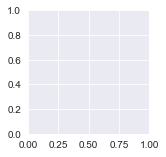

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
src_path = "C:\\Users\\march\\000 Treball Ju`yter 000\\Hackathons\\Image_sports_classification\\Imágenes-data-science-ii\\train\\"
sub_class = os.listdir(src_path)

fig = plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(240 + 1 + i)
    img = plt.imread(train_baseball_df.iloc[i].img_path)
    plt.imshow(img, cmap=plt.get_cmap('gray'))

for i in range(4,8):
    plt.subplot(240 + 1 + i)
    img = plt.imread(train_cricket_df.iloc[i].img_path)
    plt.imshow(img, cmap=plt.get_cmap('gray'))

for i in range(4,8):
    plt.subplot(240 + 1 + i)
    img = plt.imread(train_football_df.iloc[i].img_path)
    plt.imshow(img, cmap=plt.get_cmap('gray'))

In [ ]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [44]:
train_df

index                                  img_name  \
0        0  077d53ca-0425-48d6-b246-f2cd44f6bab8.png   
1        1  0e564fd2-9c18-4010-8a62-445bd899faf0.jpg   
2        2  12fdc958-a47e-4e74-8030-49b561e37664.jpg   
3        3  1d688141-3f78-4301-a465-091bef6dcce4.jpg   
4        4  1e81f6d8-bed1-4cd5-97f9-a22baa5dd621.jpg   
..     ...                                       ...   
206     59  ec2fca00-33bb-4c19-89a6-d0868c2ce858.jpg   
207     60  efe7db58-8829-40aa-85ab-fd9a641ec6b3.png   
208     61  f2097a86-5e28-40d6-ac02-6abf6e9aa6f8.jpg   
209     62  f5fc04a6-7c77-4ed6-8aa2-7316c7514b58.jpg   
210     63  f96ed5e4-c480-4912-8fc1-96a7d6139470.jpg   

                                              img_path label_name  label  
0    C:\Users\march\000 Treball Ju`yter 000\Hackath...   baseball      0  
1    C:\Users\march\000 Treball Ju`yter 000\Hackath...   baseball      0  
2    C:\Users\march\000 Treball Ju`yter 000\Hackath...   baseball      0  
3    C:\Users\march\000 Treball Ju`yter 000\Hackath...   baseball      0  
4    C:\Users\march\000 Treball Ju`yter 000\Hackath...   baseball      0  
..                                                 ...        ...    ...  
206  C:\Users\march\000 Treball Ju`yter 000\Hackath...   football      2  
207  C:\Users\march\000 Treball Ju`yter 000\Hackath...   football      2  
208  C:\Users\march\000 Treball Ju`yter 000\Hackath...   football      2  
209  C:\Users\march\000 Treball Ju`yter 000\Hackath...   football      2  
210  C:\Users\march\000 Treball Ju`yter 000\Hackath...   football      2  

[211 rows x 5 columns]

Folder structure is as follow:



In [ ]:
Folder structure used to work with images:

C:\Users\march\000 Treball Ju`yter 000\Hackathons\\\\
|--Image_sports_classification (folder)
|--|--Imágenes-data-science-ii (folder)
|--|--|--train (folder)
|--|--|--|--baseball (folder)
|--|--|--|--|--image_1.jpg
|--|--|--|--|--image_2.jpg
|--|--|--|--|--...
|--|--|--|--cricket (folder)
|--|--|--|--|--image_1.jpg
|--|--|--|--|--image_2.jpg
|--|--|--|--football (folder)
|--|--|--|--|--image_1.jpg
|--|--|--|--|--image_2.jpg
|--|--|--|--|--...
|--|--|--test (folder)
|--|--|--|--image_1.jpg
|--|--|--|--image_2.jpg
|--|--output (folder)

# Exploratory Data Analysis

In [ ]:
As the number of images is discrete, let's visualize them to validate as training pictures:

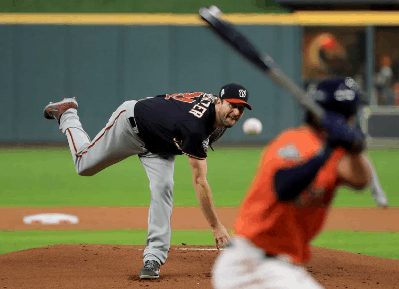

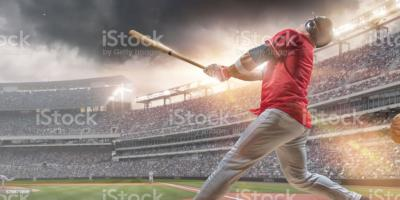

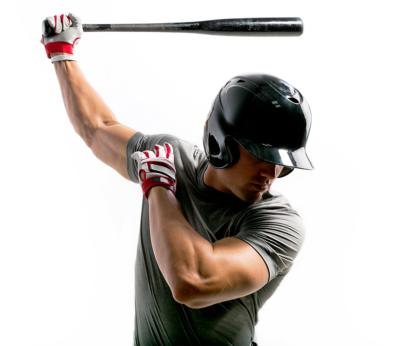

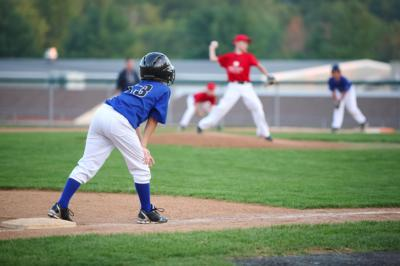

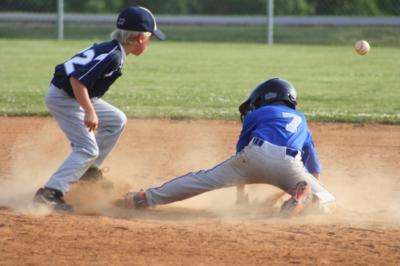

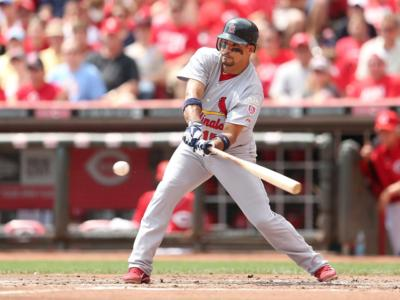

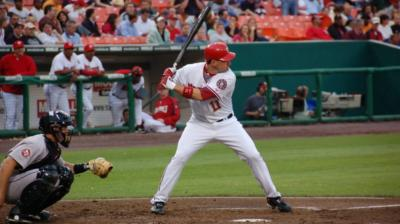

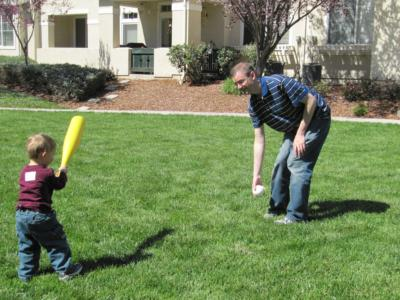

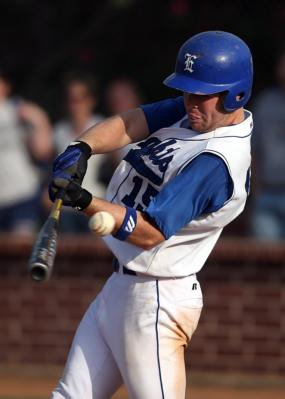

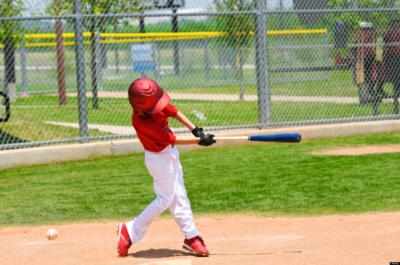

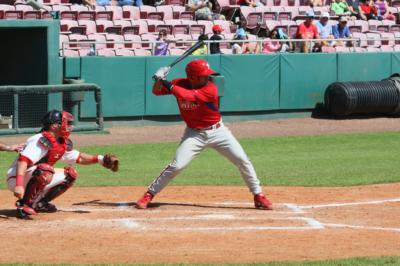

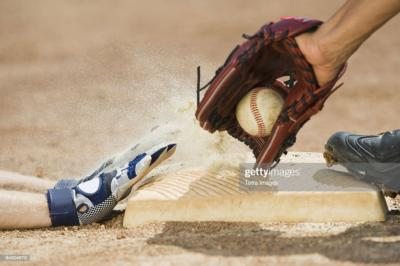

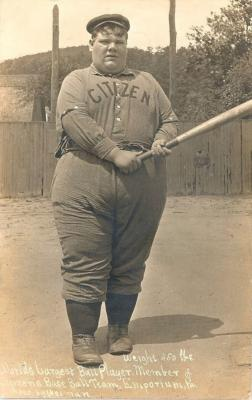

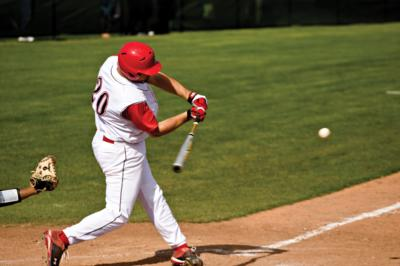

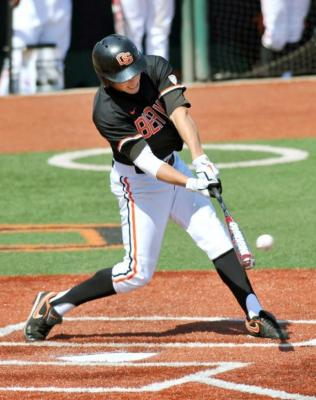

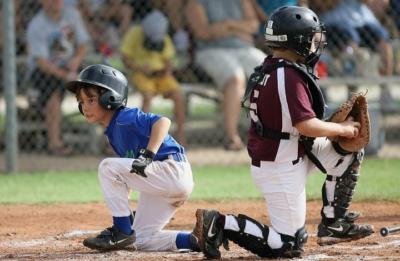

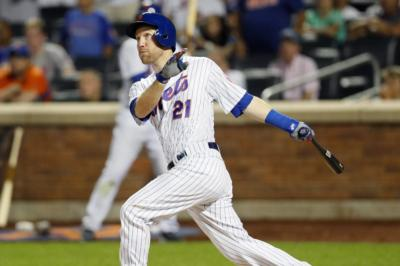

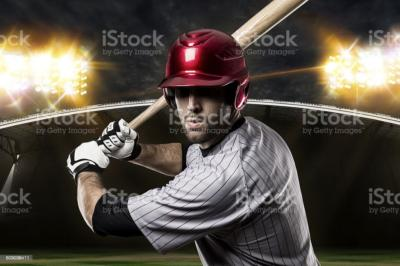

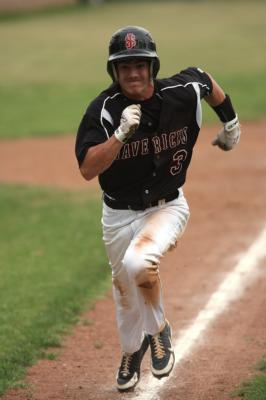

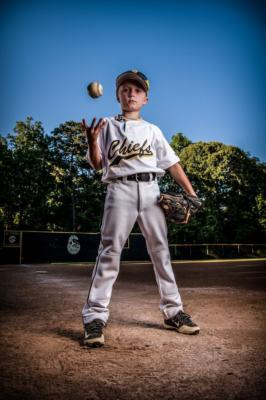

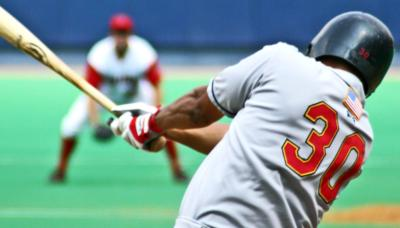

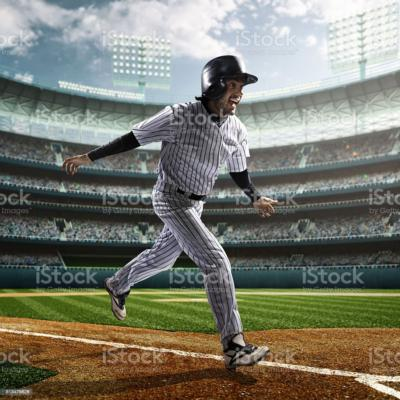

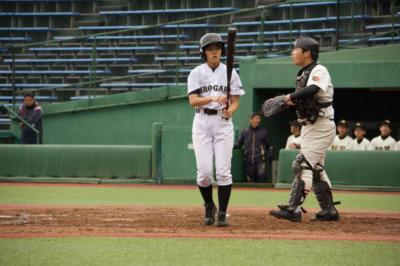

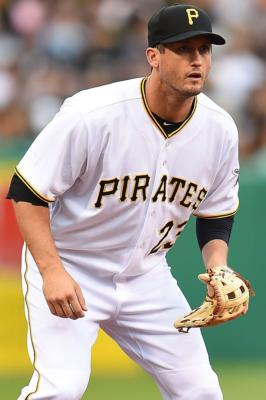

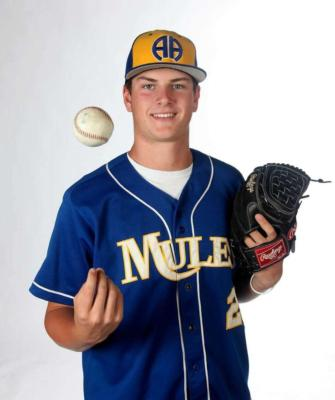

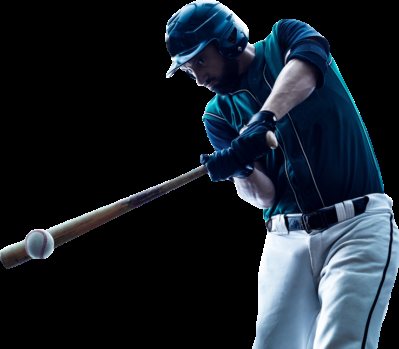

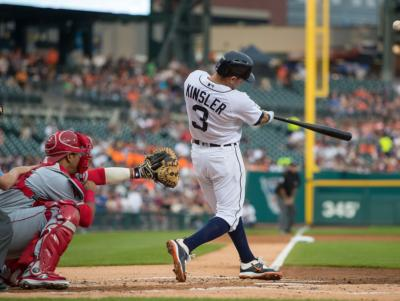

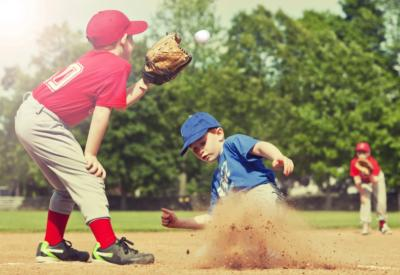

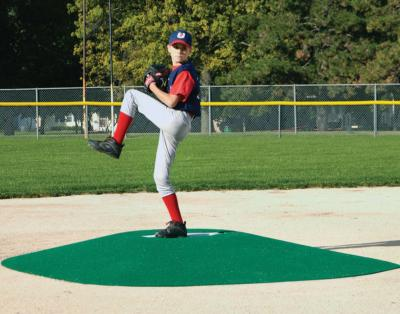

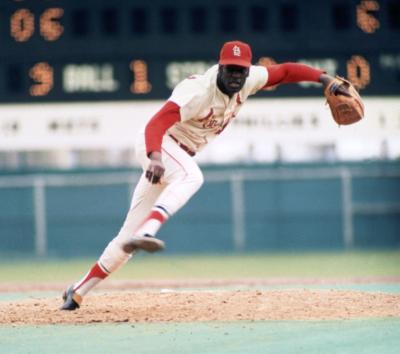

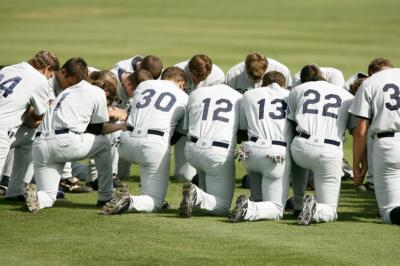

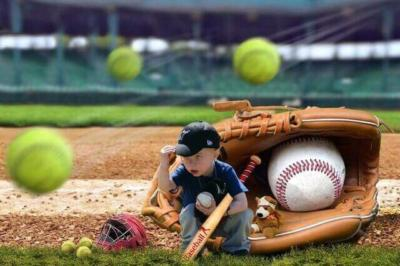

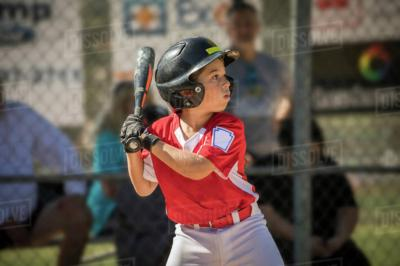

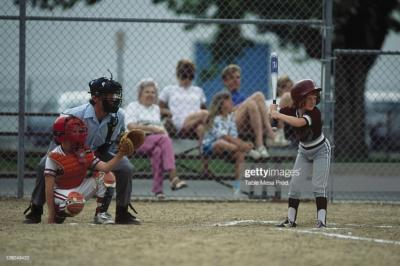

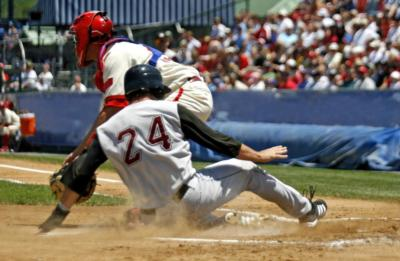

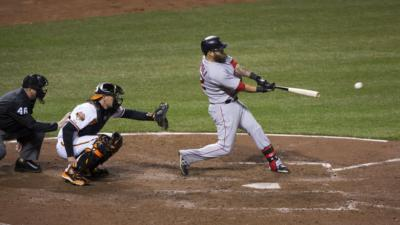

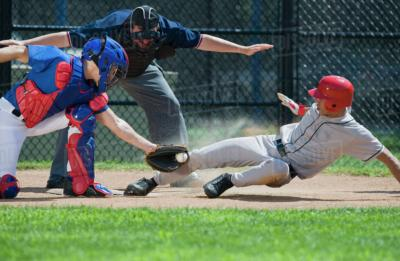

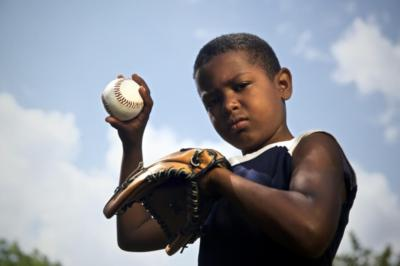

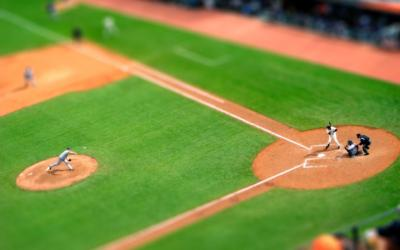

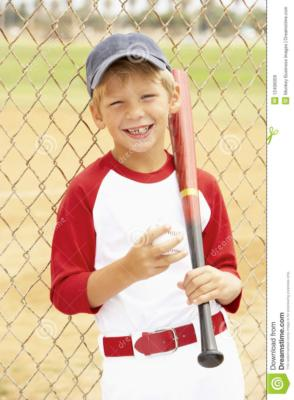

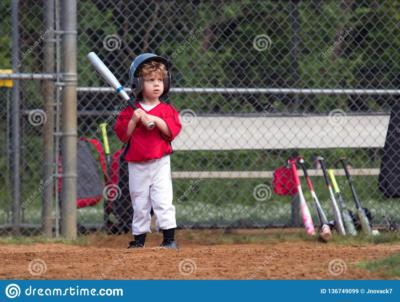

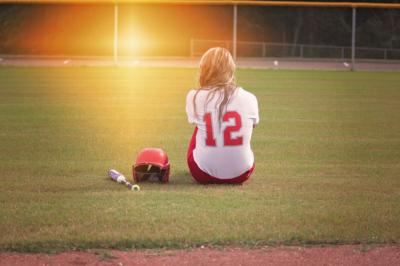

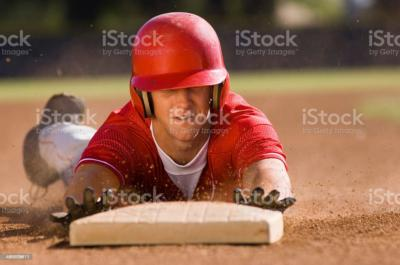

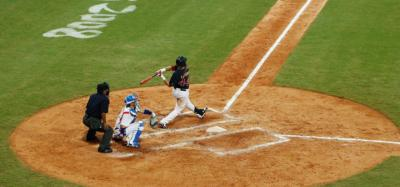

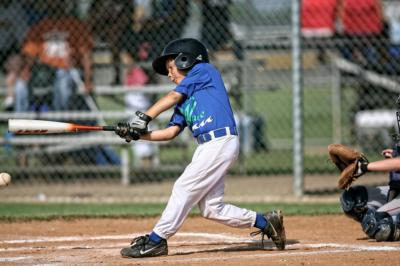

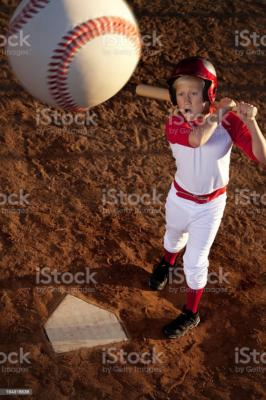

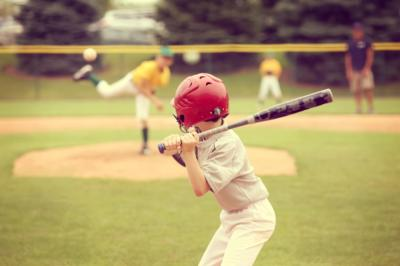

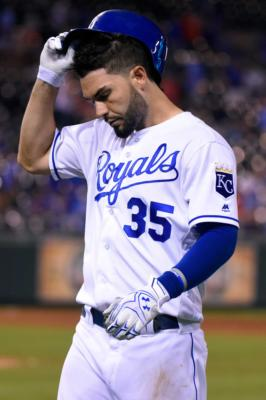

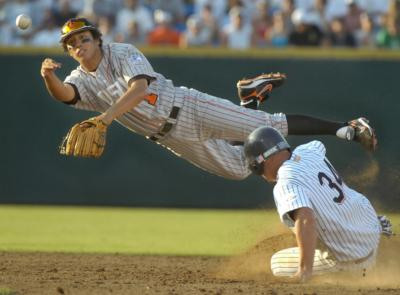

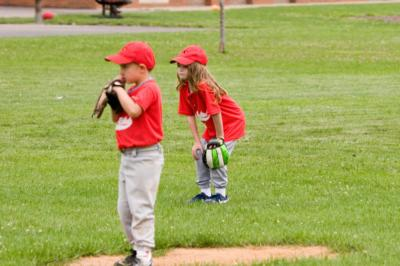

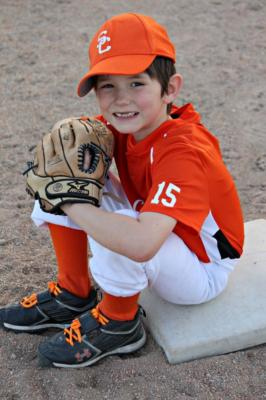

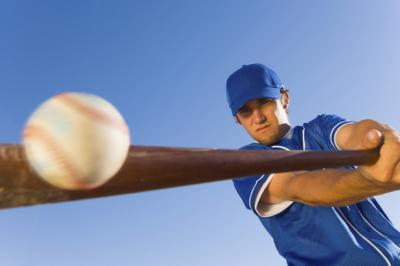

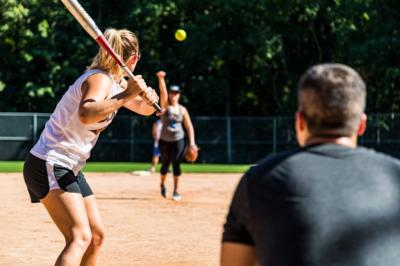

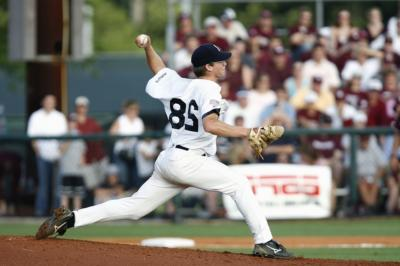

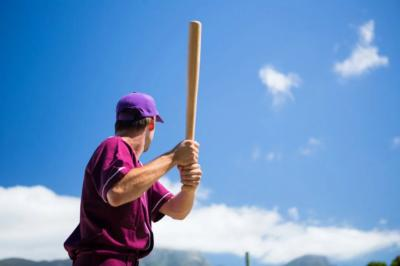

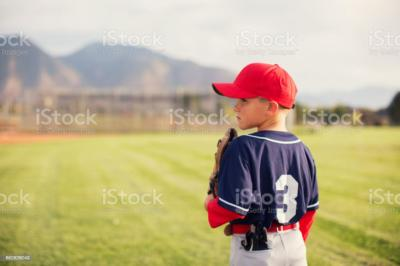

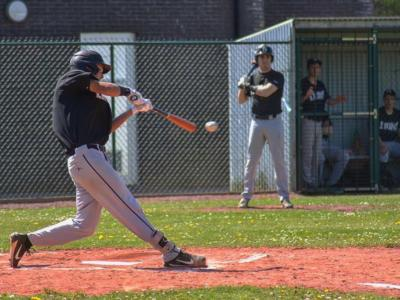

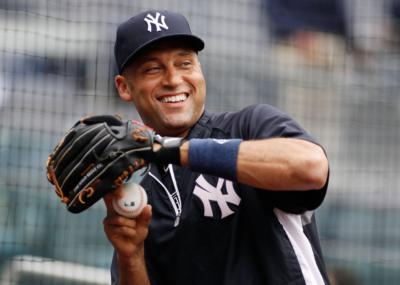

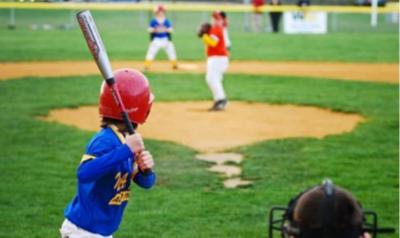

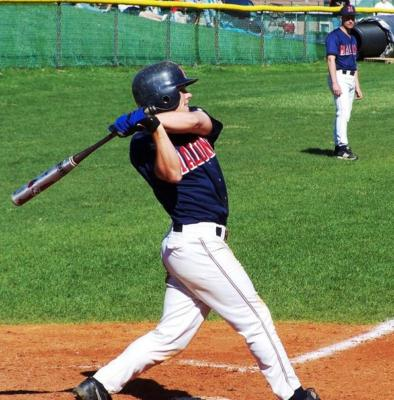

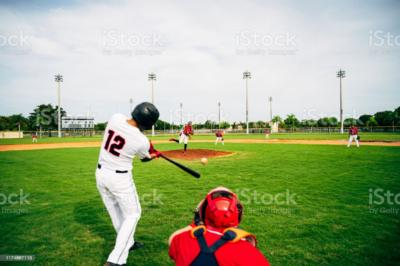

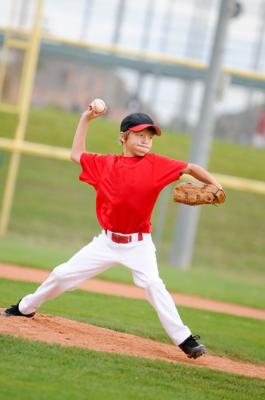

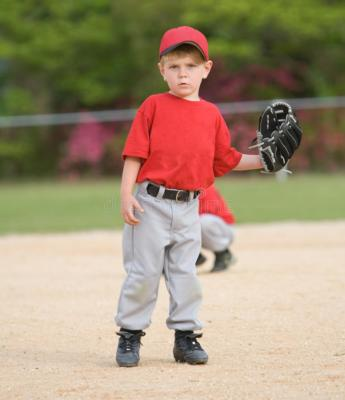

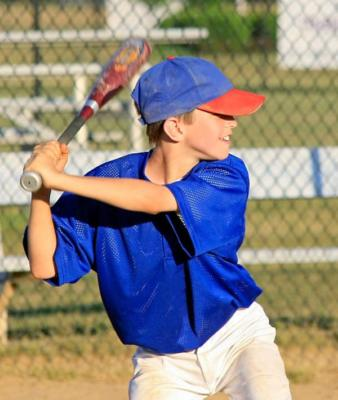

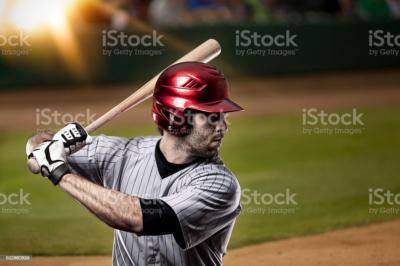

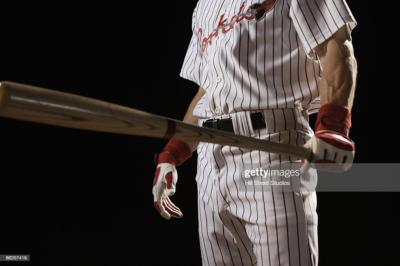

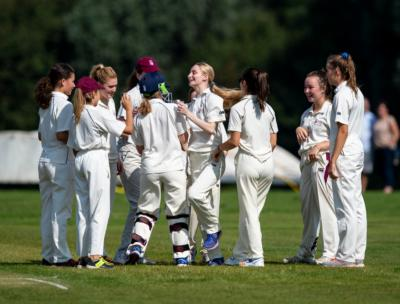

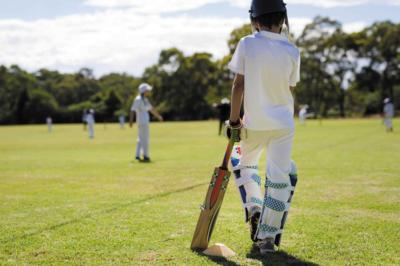

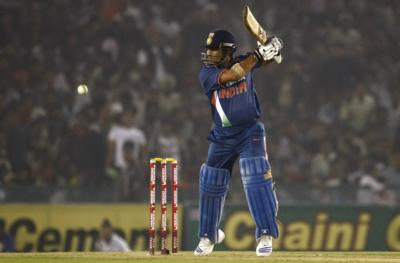

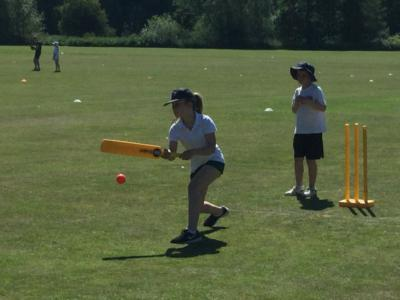

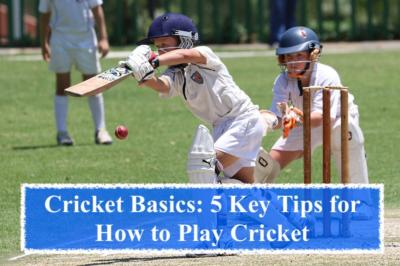

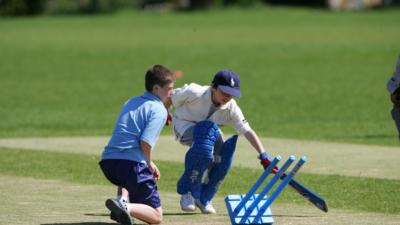

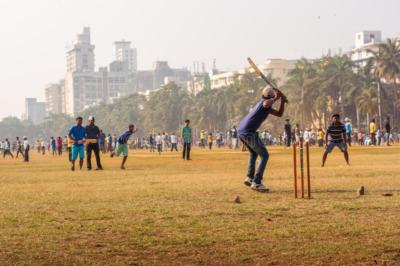

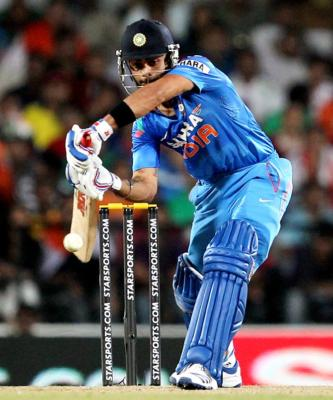

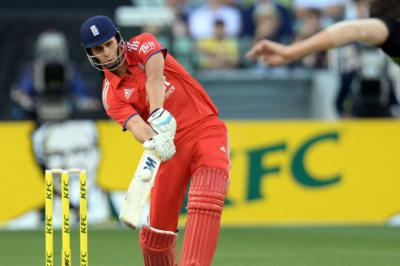

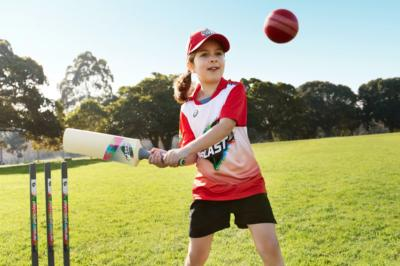

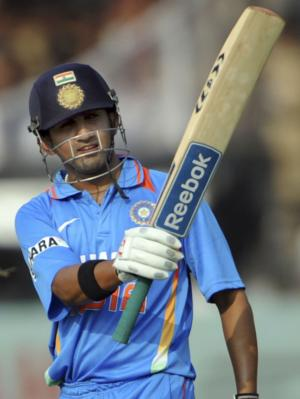

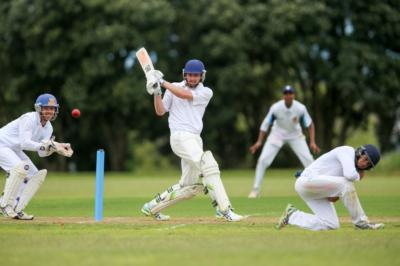

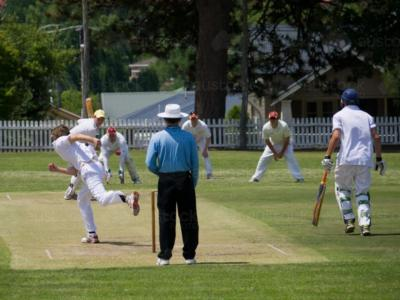

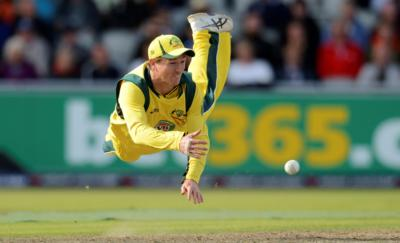

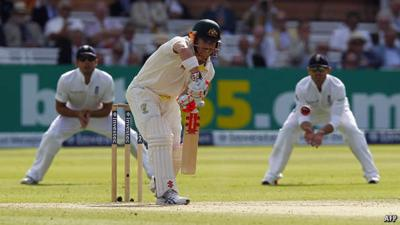

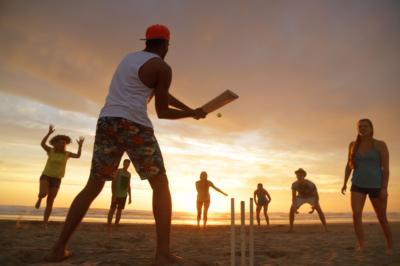

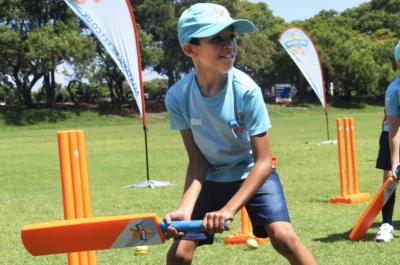

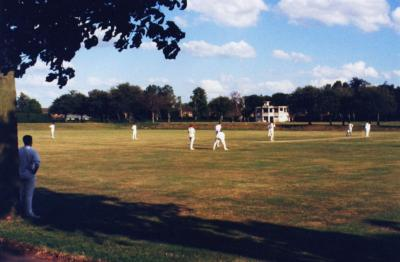

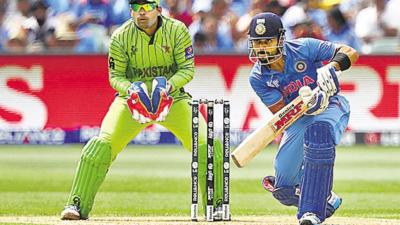

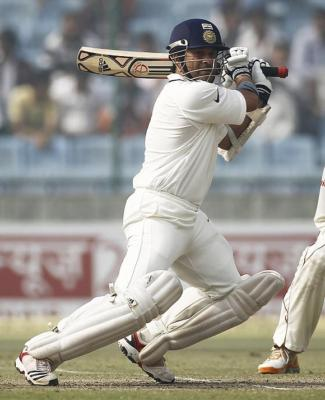

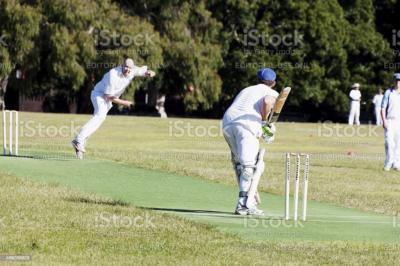

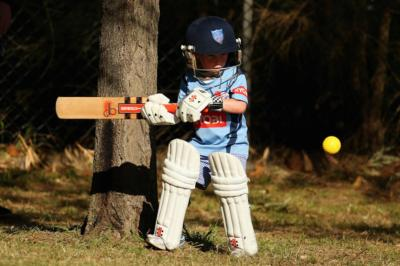

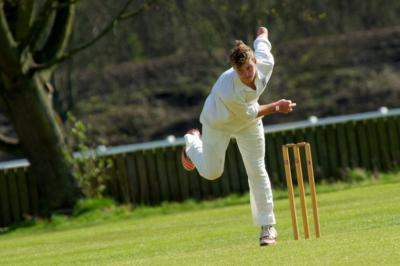

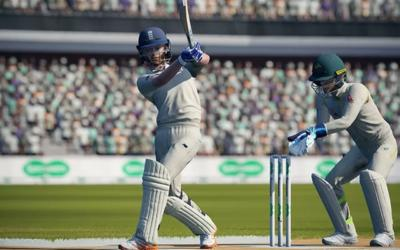

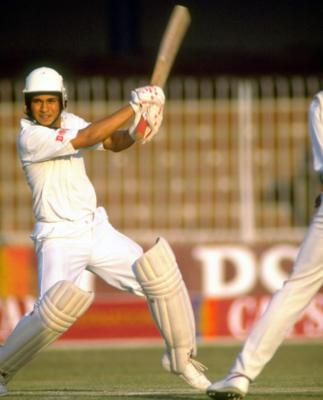

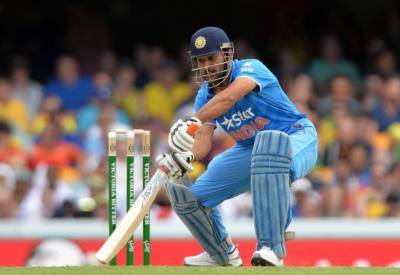

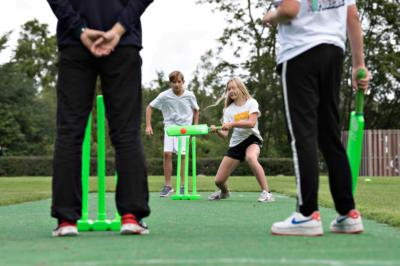

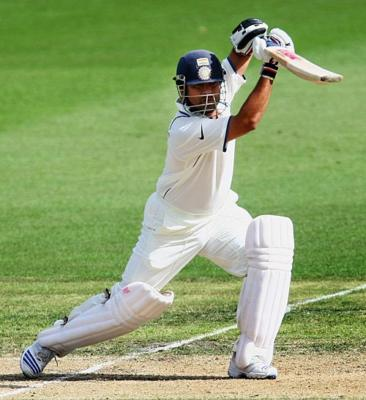

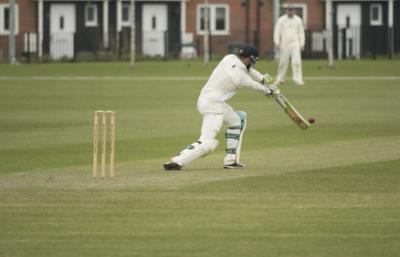

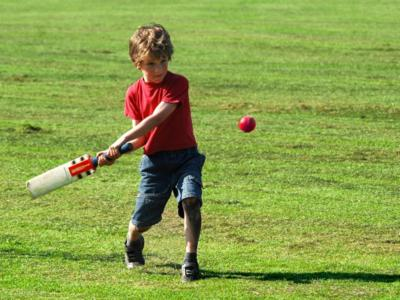

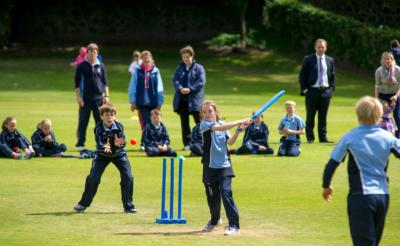

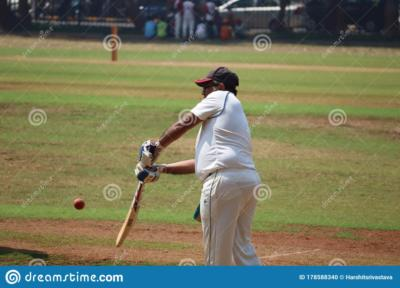

File  C:\Users\march\000 Treball Ju`yter 000\Hackathons\Image_sports_classification\Imágenes-data-science-ii\train\cricket\62b41fe6-854b-48a8-8361-48cfa6f23f58.ashx jas an incompatible format to be read!


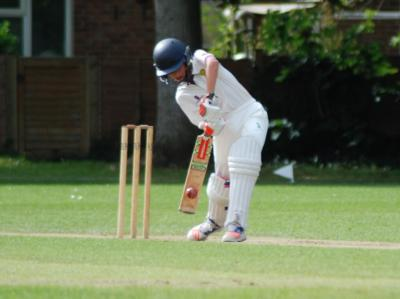

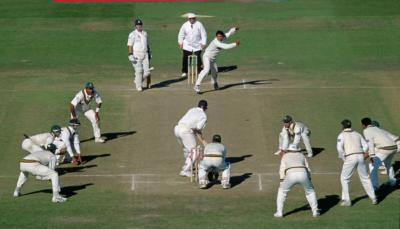

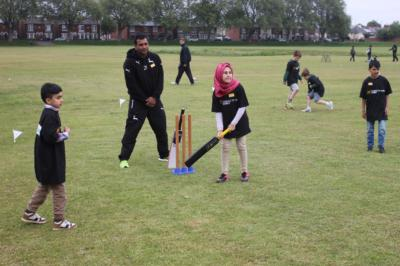

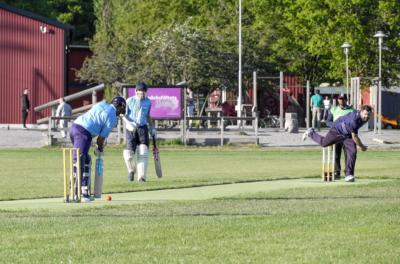

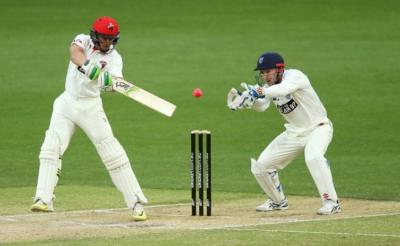

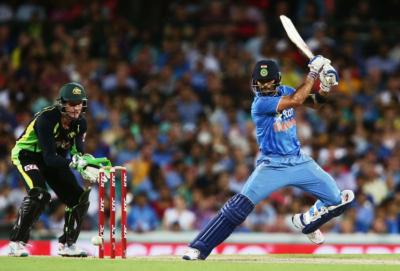

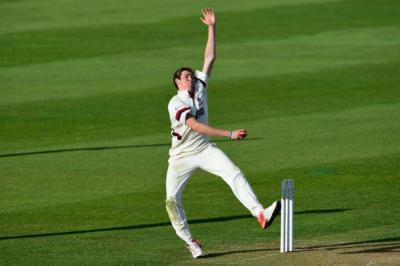

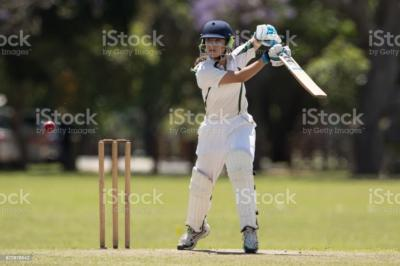

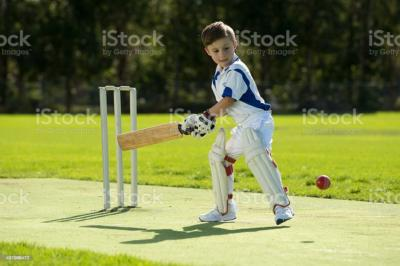

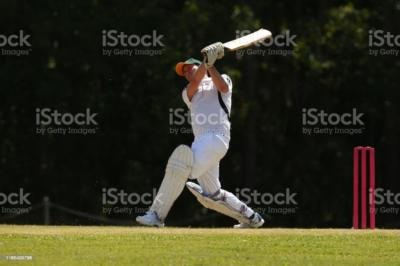

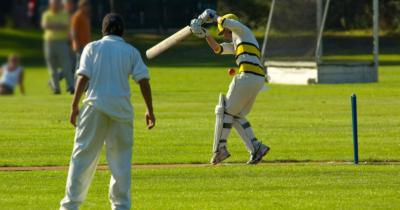

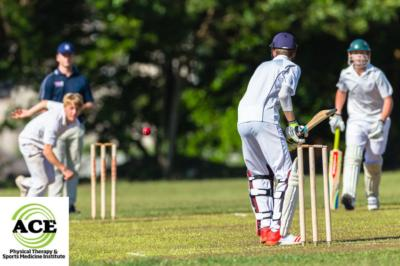

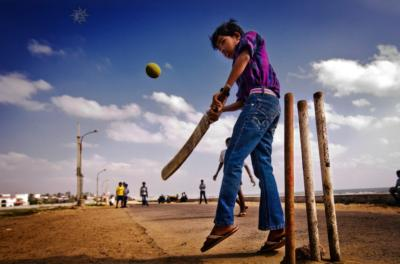

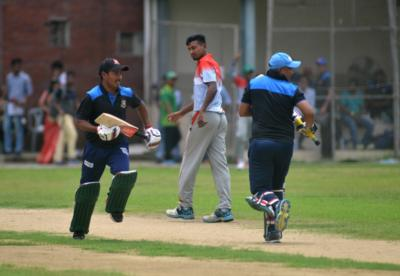

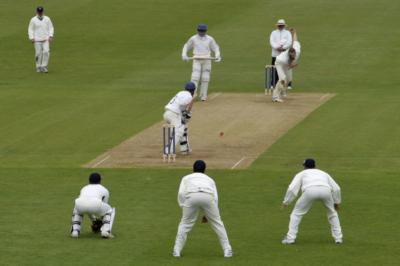

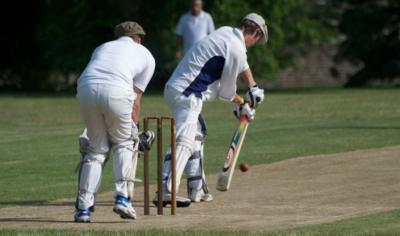

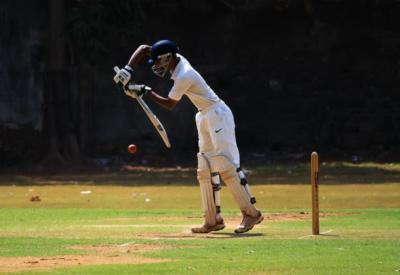

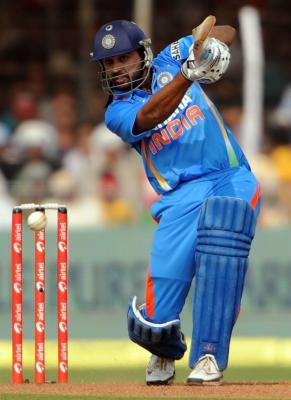

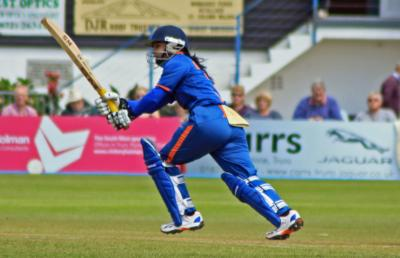

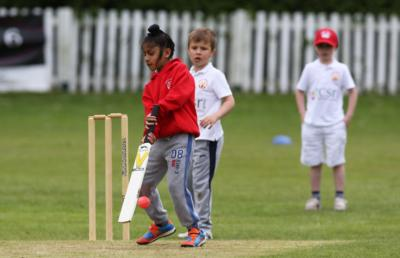

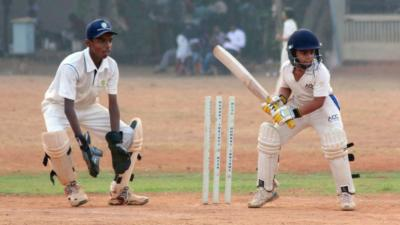

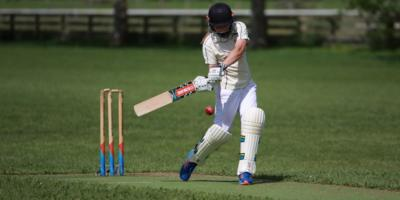

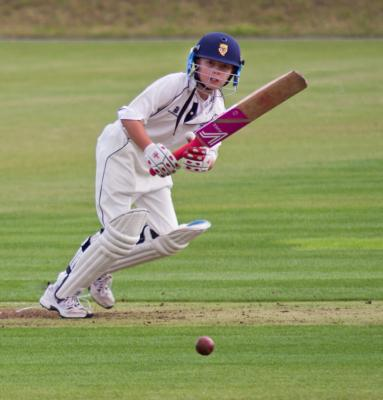

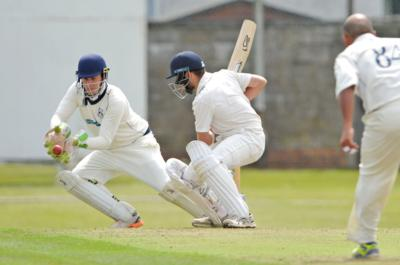

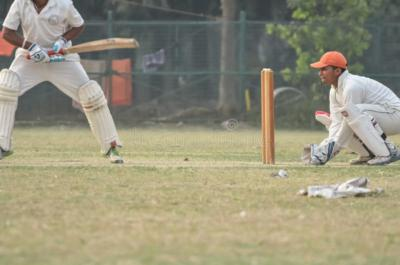

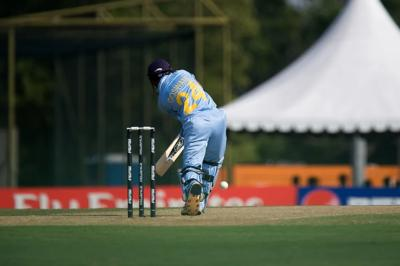

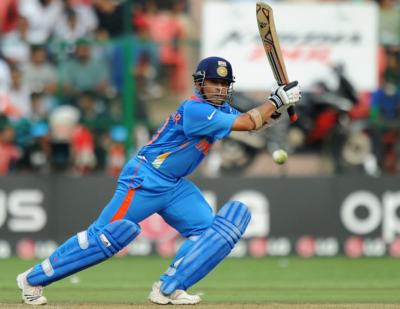

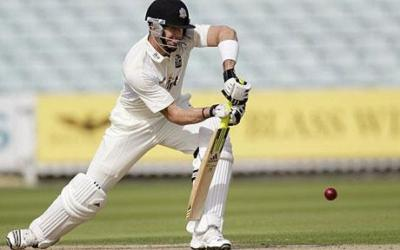

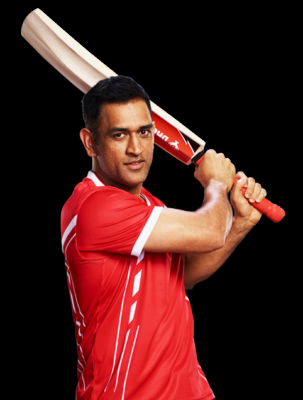

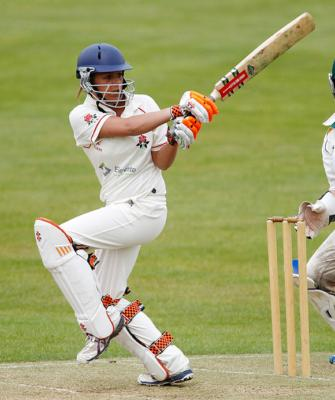

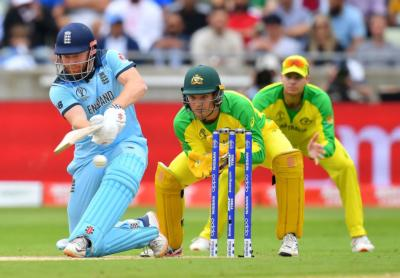

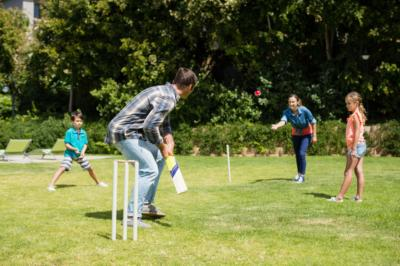

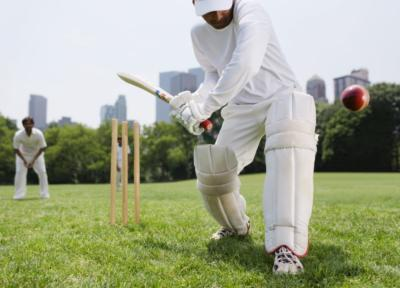

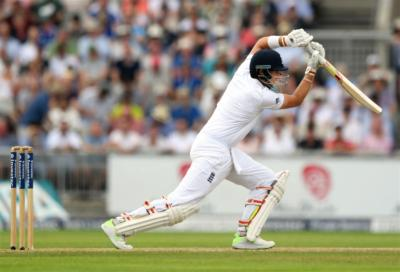

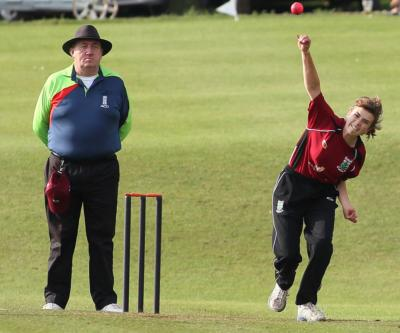

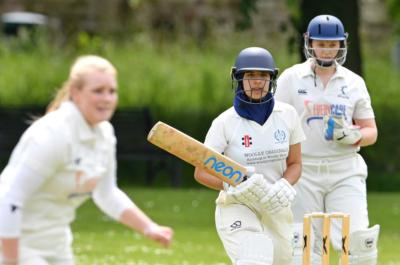

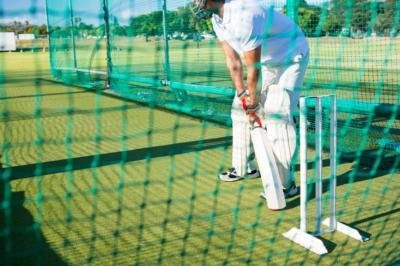

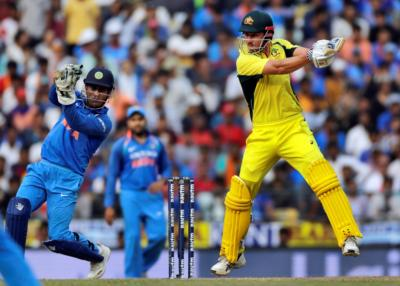

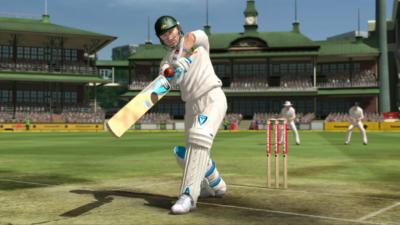

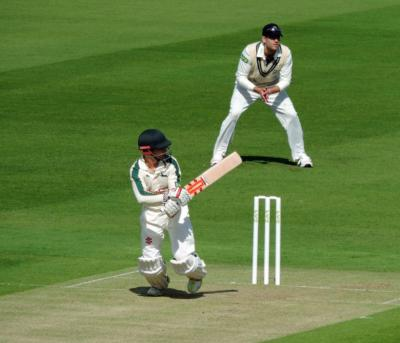

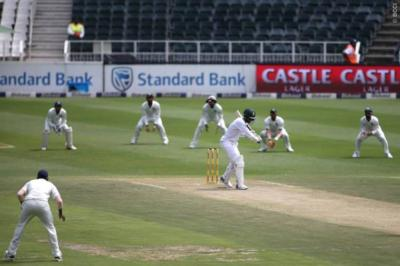

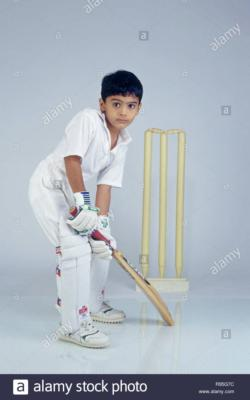

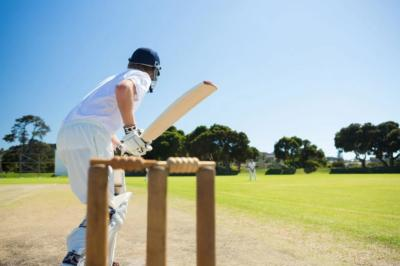

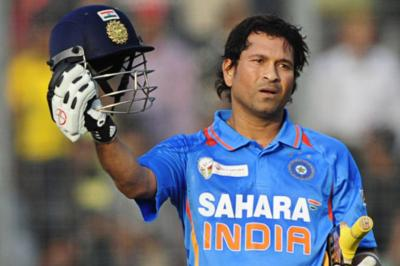

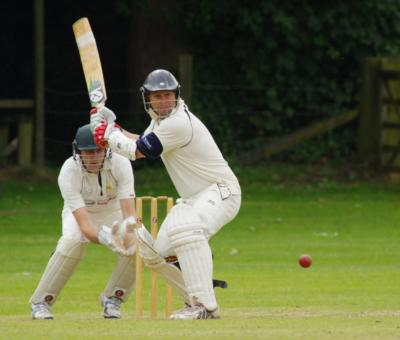

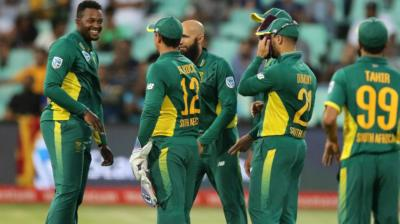

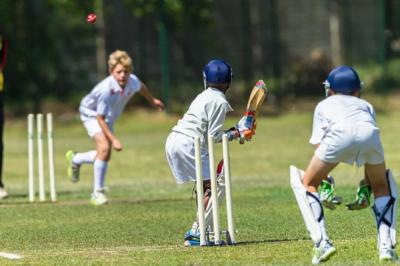

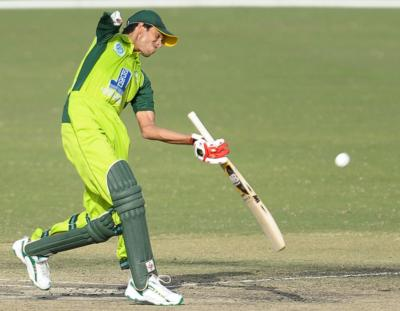

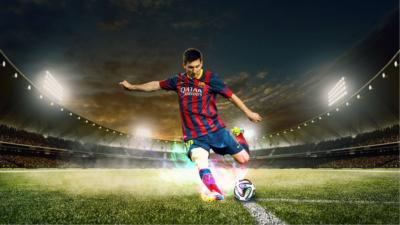

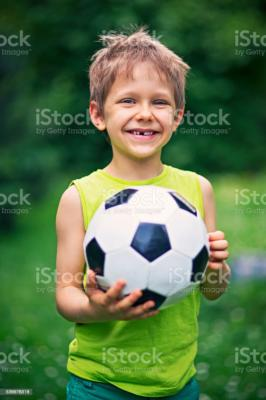

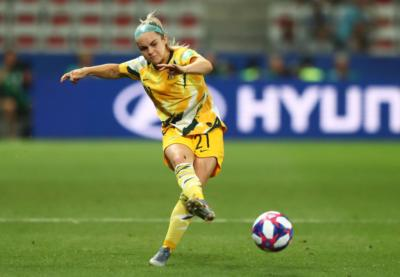

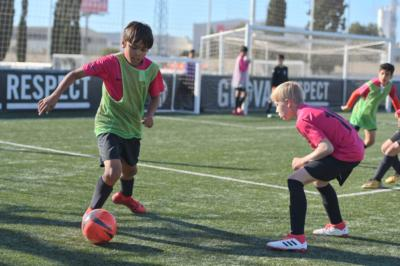

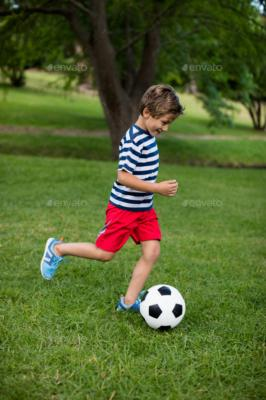

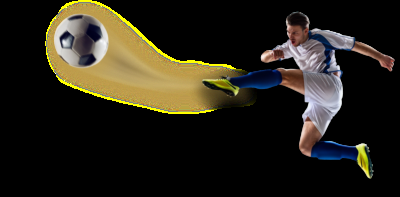

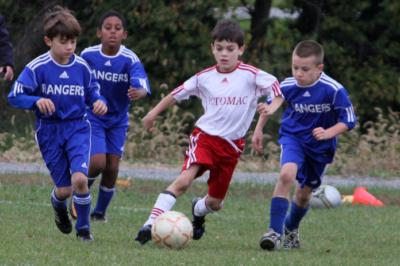

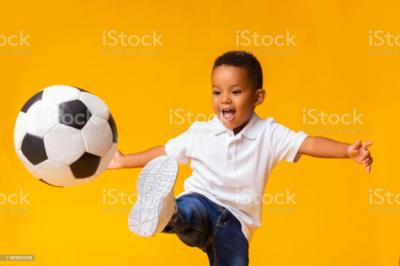

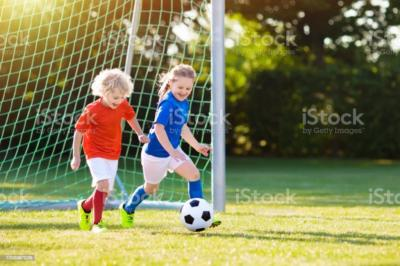

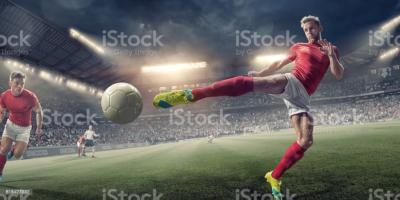

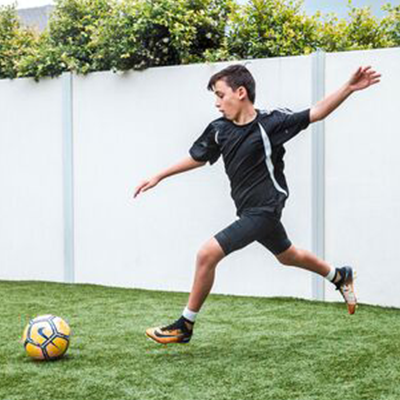

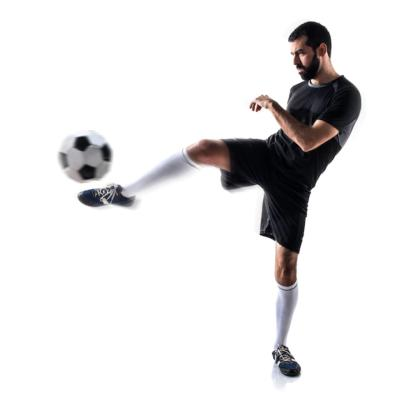

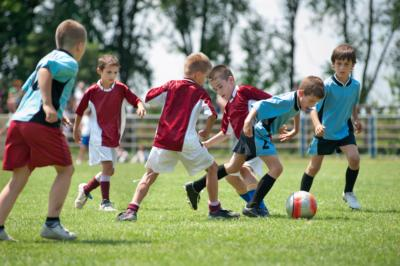

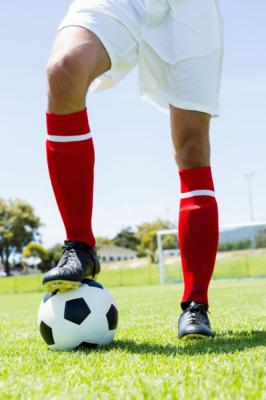

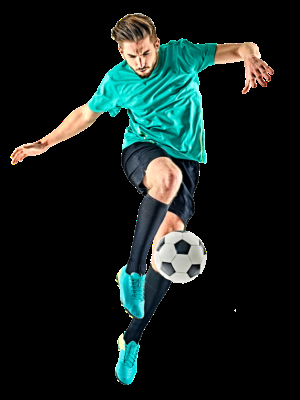

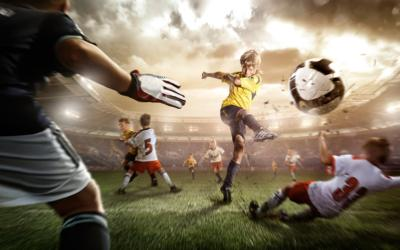

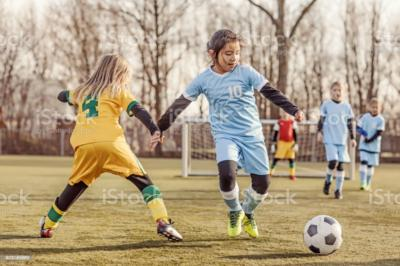

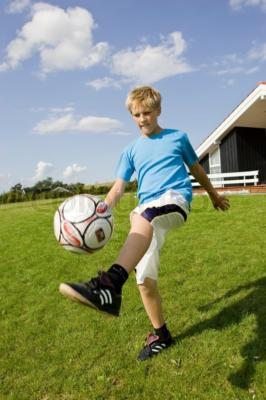

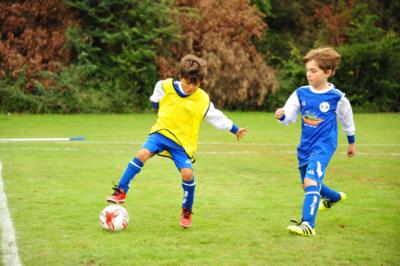

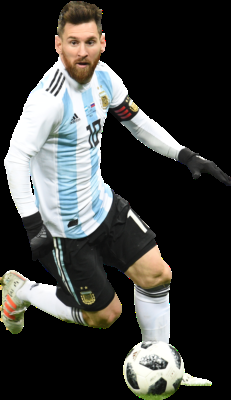

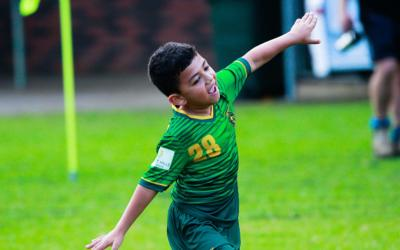

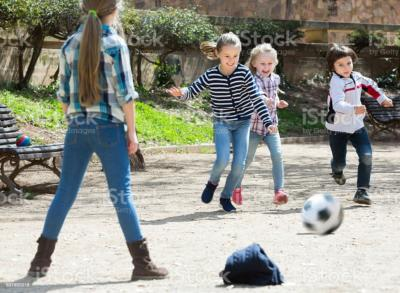

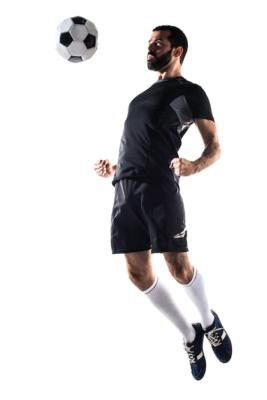

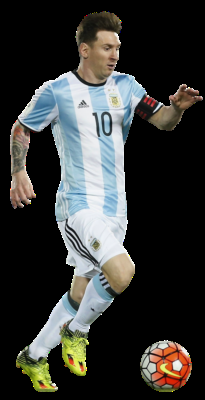

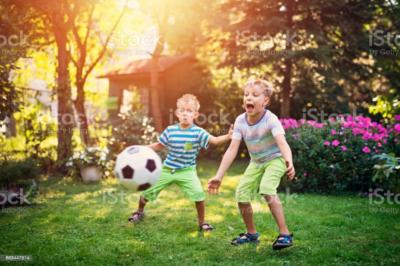

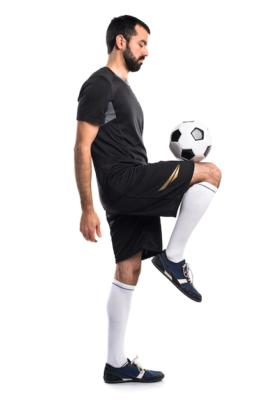

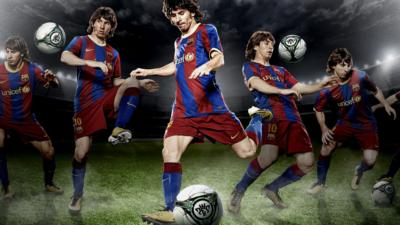

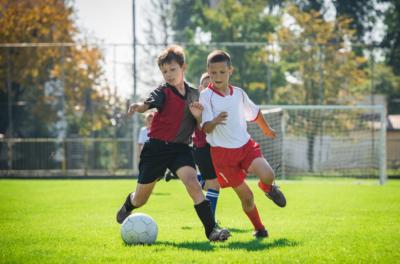

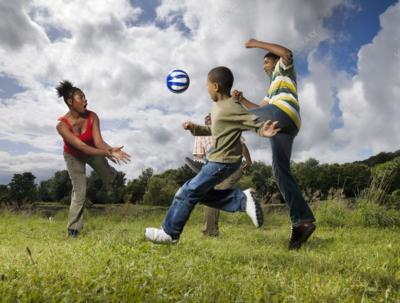

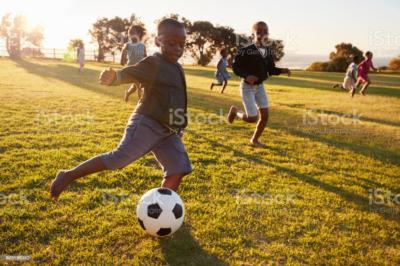

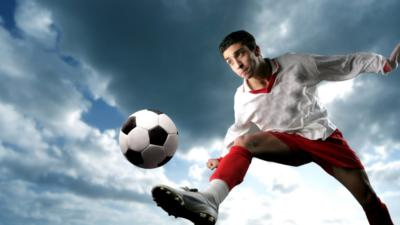

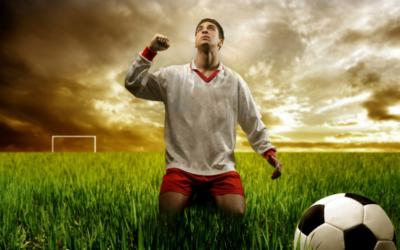

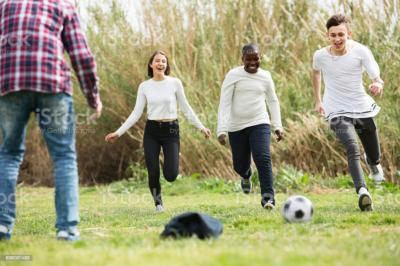

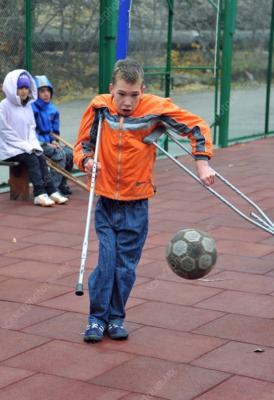

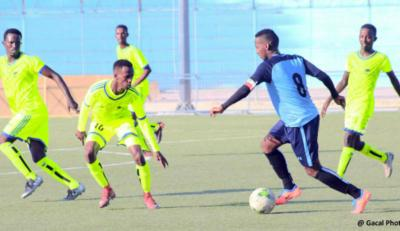

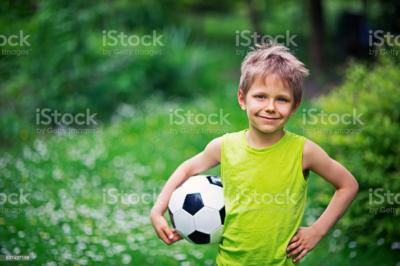

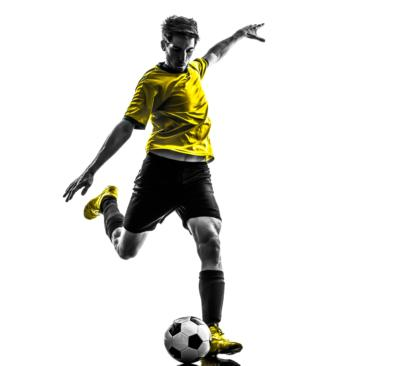

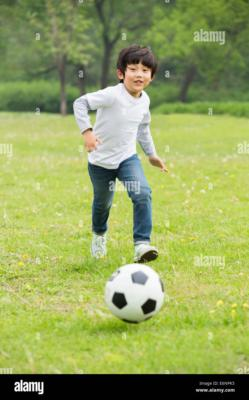

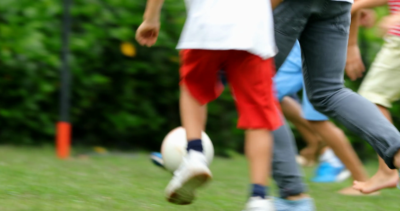

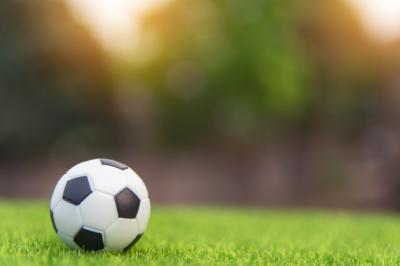

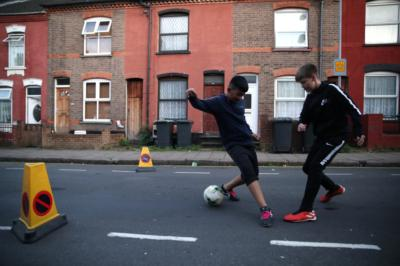

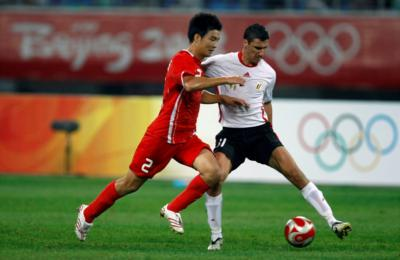

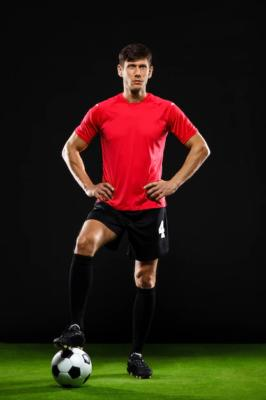

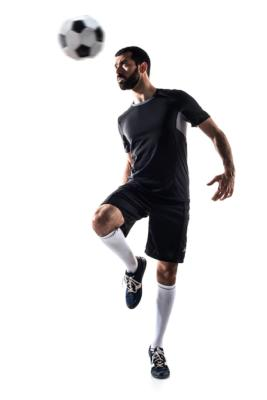

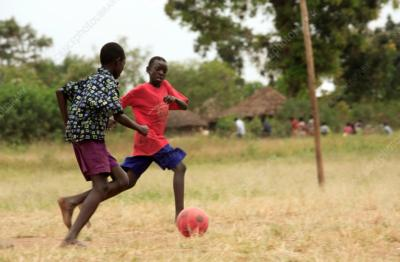

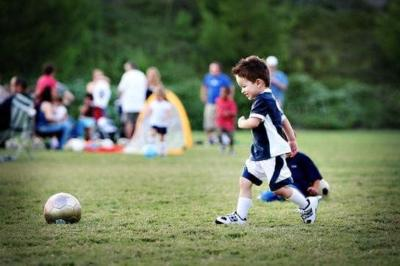

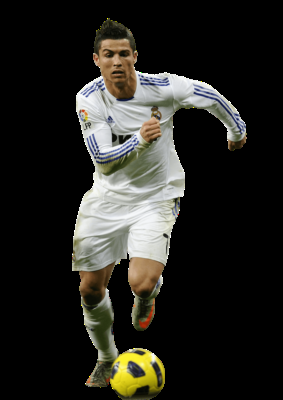

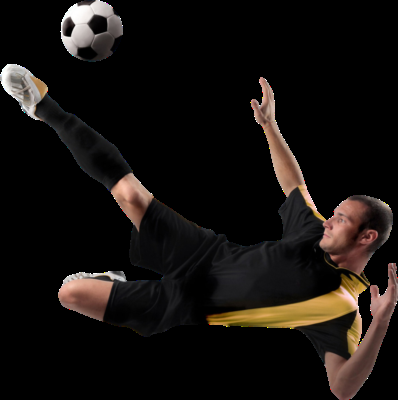

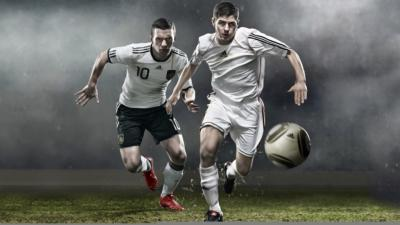

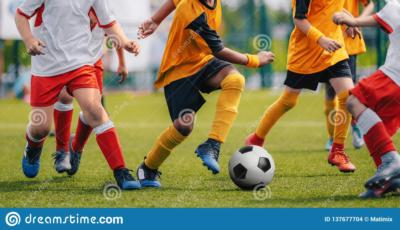

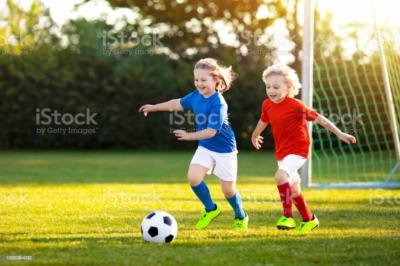

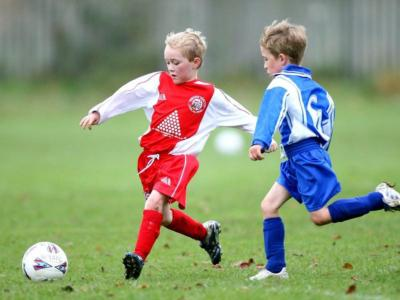

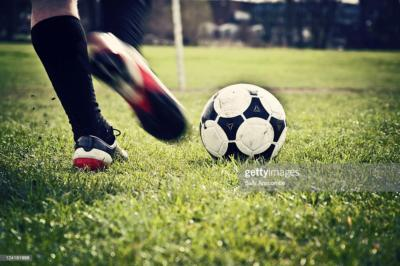

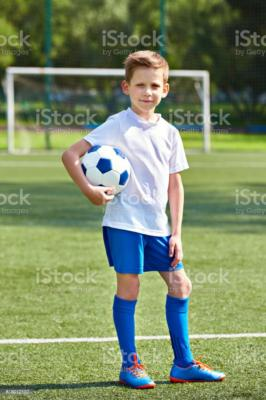

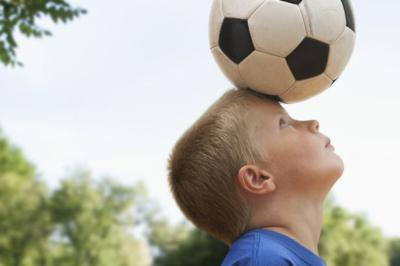

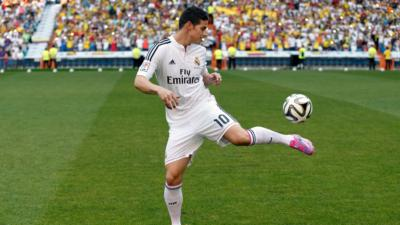

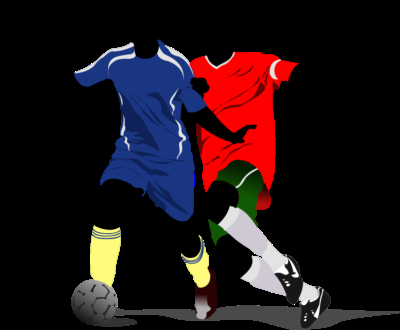

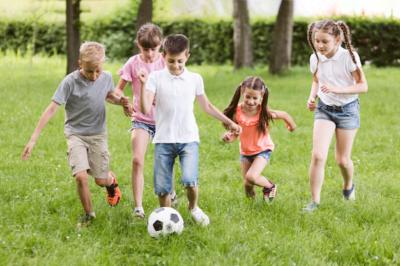

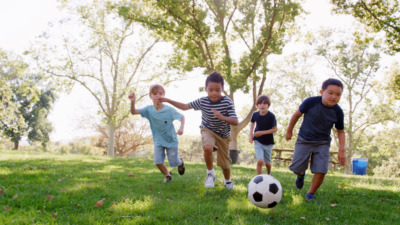

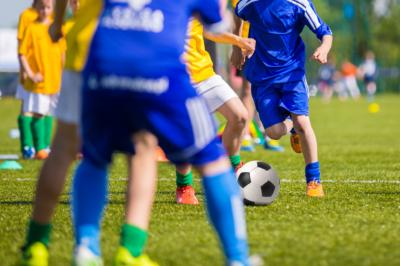

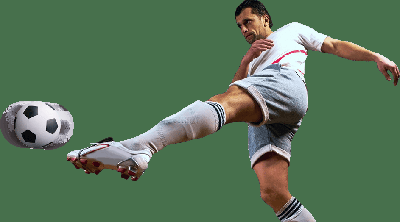

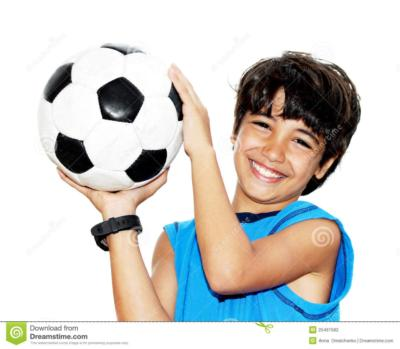

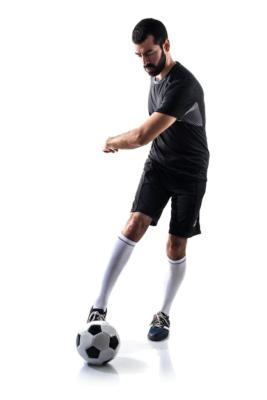

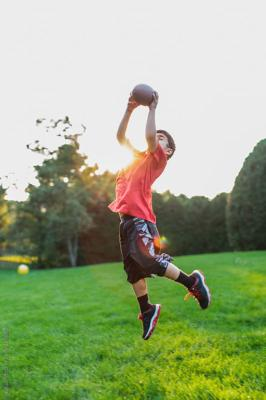

There is 1 image of a total of 211 that can not be visualised!


In [31]:
from IPython.display import Image, display
wrong_images=0
for i in range(len(train_df)):
    try:
        display(Image(filename=train_df.iloc[i].img_path, width = 200, height = 200))
    except:
        print (f'File  {train_df.iloc[i].img_path} has an incompatible format to be visualised!')
        wrong_images +=1
if wrong_images==1:
    print( f'There is {wrong_images} image of a total of {len(train_df)} that can not be visualised!')
elif wrong_images>1:
    print( f'There are {wrong_images} images of a total of {len(train_df)} that can not be visualised!')
else:
    print (f'All {len(train_df)} can be successfuly viewed with Python.')

## 2a Manera

In [25]:
train_df.groupby('label_name').count()

img_name  img_path  label
label_name                           
baseball          66        66     66
cricket           81        81     81
football          64        64     64

In [41]:
image_path_1

NameError: name 'image_path_1' is not defined

In [45]:
to_jpg_converter(image_path_1, 'b-48a8-8361-48cfa6f23f58.ashx')

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\march\\000 Treball Ju`yter 000\\Hackathons\\zzzz_proves imatges i directoris\\b-48a8-8361-48cfa6f23f58.ashx'

In [42]:
new_list_files[0]

'c00ccfe1-b018-4ea4-80eb-3552ae03b1af.jpg'

In [41]:
print (jpg_files(image_path))

['c00ccfe1-b018-4ea4-80eb-3552ae03b1af.jpg']


In [ ]:
#-----------------------------------------
# DOWNLOAD AND ORGANIZE FLOWERS17 DATASET
#-----------------------------------------
import os
import glob
import datetime
import tarfile
import urllib.request

def download_dataset(filename, url, work_dir):
	if not os.path.exists(filename):
		print("[INFO] Downloading flowers17 dataset....")
		filename, _ = urllib.request.urlretrieve(url + filename, filename)
		statinfo = os.stat(filename)
		print("[INFO] Succesfully downloaded " + filename + " " + str(statinfo.st_size) + " bytes.")
		untar(filename, work_dir)

def jpg_files(members):
	for tarinfo in members:
		if os.path.splitext(tarinfo.name)[1] == ".jpg":
			yield tarinfo

def untar(fname, path):
	tar = tarfile.open(fname)
	tar.extractall(path=path, members=jpg_files(tar))
	tar.close()
	print("[INFO] Dataset extracted successfully.")

#-------------------------
# MAIN FUNCTION
#-------------------------
if __name__ == '__main__':
	flowers17_url  = "http://www.robots.ox.ac.uk/~vgg/data/flowers/17/"
	flowers17_name = "17flowers.tgz"
	train_dir      = "dataset"

	if not os.path.exists(train_dir):
		os.makedirs(train_dir)

	download_dataset(flowers17_name, flowers17_url, train_dir)
	if os.path.exists(train_dir + "\\jpg"):
		os.rename(train_dir + "\\jpg", train_dir + "\\train")


	# get the class label limit
	class_limit = 17

	# take all the images from the dataset
	image_paths = glob.glob(train_dir + "\\train\\*.jpg")

	# variables to keep track
	label = 0
	i = 0
	j = 80

	# flower17 class names
	class_names = ["daffodil", "snowdrop", "lilyvalley", "bluebell", "crocus",
			   	   "iris", "tigerlily", "tulip", "fritillary", "sunflower", 
			       "daisy", "coltsfoot", "dandelion", "cowslip", "buttercup",
			       "windflower", "pansy"]

	# loop over the class labels
	for x in range(1, class_limit+1):
		# create a folder for that class
		os.makedirs(train_dir + "\\train\\" + class_names[label])
		
		# get the current path
		cur_path = train_dir + "\\train\\" + class_names[label] + "\\"
		
		# loop over the images in the dataset
		for index, image_path in enumerate(image_paths[i:j], start=1):
			original_path   = image_path
			image_path      = image_path.split("\\")
			image_file_name = str(index) + ".jpg"
			os.rename(original_path, cur_path + image_file_name)
		
		i += 80
		j += 80
		label += 1

In [7]:
class_names= [0,1,2]

labels = {
        0: 'baseball',
        1: 'cricket',
        2: 'football'
    }

In [ ]:
sdir=r'C:\Users\march\000 Treball Ju`yter 000\Hackathons\Image_sports_classification'
, index_col=0)../input/sports-classification'
csvpath=r'C:\Users\march\000 Treball Ju`yter 000\Hackathons\Image_sports_classification\sports????.csv'
df=pd.read_csv(csvpath)


In [ ]:
# check for missing values
print('number of missing values in df is =', df.isna().sum().sum())
df.columns=['filepaths', 'labels',  'data_set']
train_df=df.query('data_set== "train"')
test_df=df.query('data_set== "test"')

In [ ]:

valid_df = df.query('data_set== "valid"')
# convert data in filepaths column to the full path to the images
train_df['filepaths']=train_df['filepaths'].apply(lambda x: os.path.join(sdir, x))
test_df['filepaths']=test_df['filepaths'].apply(lambda x: os.path.join(sdir, x))
valid_df['filepaths']=valid_df['filepaths'].apply(lambda x: os.path.join(sdir, x))
print('train_df lenght: ', len(train_df), '  test_df length: ', len(test_df), '  valid_df length: ', len(valid_df))
# get the number of classes and the images count for each class in train_df
classes=list(train_df['labels'].unique())
class_count = len(classes)
print('The number of classes in the dataset is: ', class_count)
groups=train_df.groupby('labels')
print('{0:^30s} {1:^13s}'.format('CLASS', 'IMAGE COUNT'))
countlist=[]
classlist=[]
for label in train_df['labels'].unique():
    group=groups.get_group(label)
    countlist.append(len(group))
    classlist.append(label)
    print('{0:^30s} {1:^13s}'.format(label, str(len(group))))

# get the classes with the minimum and maximum number of train images
max_value=np.max(countlist)
max_index=countlist.index(max_value)
max_class=classlist[max_index]
min_value=np.min(countlist)
min_index=countlist.index(min_value)
min_class=classlist[min_index]
print(max_class, ' has the most images= ',max_value, ' ', min_class, ' has the least images= ', min_value)
# lets get the average height and width of a sample of the train images
ht=0
wt=0
# select 100 random samples of train_df
train_df_sample=train_df.sample(n=100, random_state=123,axis=0)
for i in range (len(train_df_sample)):
    fpath=train_df_sample['filepaths'].iloc[i]
    img=plt.imread(fpath)
    shape=img.shape
    ht += shape[0]
    wt += shape[1]
print('average height= ', ht//100, ' average width= ', wt//100, 'aspect ratio= ', ht/wt)

In [ ]:
def trim(df, max_samples, min_samples):
    '''Trim the df dataframe to max and min samples
    Define the trim function which inputs a dataframe df and returns a trimmed dataframe
    where no class has more samples the max_samples and no class has less than min_samples
    trimming the dataset is useful when it contains more sample images in some classes where
    it has more samples than needed or to few samples for classification purposes.
    this makes it easier to balance the dataset and reduces training time of the model'''
    
    df=df.copy()
    groups=df.groupby('labels')    
    trimmed_df = pd.DataFrame(columns = df.columns)
    groups=df.groupby('labels')
    for label in df['labels'].unique(): 
        group=groups.get_group(label)
        count=len(group)    
        if count > max_samples:
            sampled_group=group.sample(n=max_samples, random_state=123,axis=0)
            trimmed_df=pd.concat([trimmed_df, sampled_group], axis=0)
        else:
            if count>=min_samples:
                sampled_group=group        
                trimmed_df=pd.concat([trimmed_df, sampled_group], axis=0)
    print('after trimming, the maximum samples in any class is now ',max_samples, ' and the minimum samples in any class is ', min_samples)
    return trimmed_df


In [ ]:
def balance(df, n, working_dir, img_size):
    ''' Balance the dataset
The balance function defined below takes in a dataframe and an integer n and returns a dataframe
where each class has n samples in each class'''

    df=df.copy()
     # make directories to store augmented images
    aug_dir=os.path.join(working_dir, 'aug')
    if os.path.isdir(aug_dir):
        shutil.rmtree(aug_dir) # start with an clean empty directory
    os.mkdir(aug_dir)
    for label in df['labels'].unique():    
        dir_path=os.path.join(aug_dir,label)    
        os.mkdir(dir_path)
    # create and store the augmented images  
    total=0
    gen=ImageDataGenerator(horizontal_flip=True,  rotation_range=20, width_shift_range=.2,
                                  height_shift_range=.2, zoom_range=.2)
    groups=df.groupby('labels') # group by class
    for label in df['labels'].unique():  # for every class               
        group=groups.get_group(label)  # a dataframe holding only rows with the specified label 
        sample_count=len(group)   # determine how many samples there are in this class  
        if sample_count< n: # if the class has less than target number of images
            aug_img_count=0
            delta=n - sample_count  # number of augmented images to create
            target_dir=os.path.join(aug_dir, label)  # define where to write the images
            msg='{0:40s} for class {1:^30s}'.format(' ', label)
            print(msg, '\r', end='') # prints over on the same line
            aug_gen=gen.flow_from_dataframe( group,  x_col='filepaths', y_col=None, target_size=img_size,
                                            class_mode=None, batch_size=1, shuffle=False, 
                                            save_to_dir=target_dir, save_prefix='aug-', color_mode='rgb',
                                            save_format='jpg')
            while aug_img_count<delta:
                images=next(aug_gen)            
                aug_img_count += len(images)
            total +=aug_img_count
    
    print('Total Augmented images created= ', total)
    # create aug_df and merge with train_df to create composite training set ndf
    if total>0:
        aug_fpaths=[]
        aug_labels=[]
        classlist=os.listdir(aug_dir)
        for klass in classlist:
            classpath=os.path.join(aug_dir, klass)     
            flist=os.listdir(classpath)    
            for f in flist:        
                fpath=os.path.join(classpath,f)         
                aug_fpaths.append(fpath)
                aug_labels.append(klass)
        Fseries=pd.Series(aug_fpaths, name='filepaths')
        Lseries=pd.Series(aug_labels, name='labels')
        aug_df=pd.concat([Fseries, Lseries], axis=1)        
        df=pd.concat([df,aug_df], axis=0).reset_index(drop=True)
    return df 

''' EXEMPLE

n=120 # number of samples in each class
working_dir=r'./' # directory to store augmented images
img_size=(150,150) # size of augmented images
train_df=balance(train_df, n, working_dir, img_size)

Found 112 validated image filenames.     for class           air hockey           
Found 112 validated image filenames.     for class        ampute football         
Found 99 validated image filenames.      for class         arm wrestling          
Found 113 validated image filenames.     for class          axe throwing          
Found 108 validated image filenames.     for class         baton twirling         
Found 111 validated image filenames.     for class           bike polo            
Found 116 validated image filenames.     for class             boxing             
Found 118 validated image filenames.     for class              gaga              
Found 102 validated image filenames.     for class       horseshoe pitching       
Found 108 validated image filenames.     for class       hydroplane racing        
Found 112 validated image filenames.     for class          ice yachting          
Found 118 validated image filenames.     for class            jousting            
Found 111 validated image filenames.     for class            mushing             
Found 118 validated image filenames.     for class         pole climbing          
Found 112 validated image filenames.     for class          pole dancing          
Found 59 validated image filenames.      for class          sky surfing           
Found 117 validated image filenames.     for class         snow boarding          
Found 99 validated image filenames.      for class            ultimate            
Found 103 validated image filenames.     for class         water cycling          
Found 106 validated image filenames.     for class     wheelchair basketball      
Found 119 validated image filenames.     for class       wheelchair racing        
Found 98 validated image filenames.      for class        wingsuit flying         
Total Augmented images created=  269'''




In [ ]:
class_names= [0,1,2]

labels = {
        0: 'baseball',
        1: 'cricket',
        2: 'football',
        3: 'Invalid Image'
    }
def image_classification(df):
    '''classification manually of images for training purpouses
        INPUT: data frame with the full paths of images 
        OUTPUT: return same data frame with a column of labels 
        according to the choice of user: 0,1,or2 for sport, 3 if does not mach with the required sports''' 
    import sys # to access the system
    import cv2
    
    labels = []
    for i in range (len(df)):        
        img = cv2.imread(df['full_path'].iloc[i], cv2.IMREAD_ANYCOLOR)

        while True:
            name = df['full_path'].split('\\')[-1] # No VERIFICATTTT
            cv2.imshow(name, img)
            cv2.waitKey(0)
            response= False
            while response =False:
                    sport = input ('Which sport is in the image: 0: baseball / 1: cricket / 2: football / 3: None of the previuos sports')
                    if sport not in [0,1,2,3]:
                        print ('Incorrect answer, please try again')
                    else:
                        print (f'Your choice was {labels[sport]}.')
                        labels.append(sport)
                        response=True
            sys.exit() # to exit from all the processes
        
        cv2.destroyAllWindows() # destroy all windows
            

In [ ]:
# Create the train_gen, test_gen and valid_gen
batch_size=40 # We will use and EfficientetB3 model, with image size of (200, 250) this size should not cause resource error
trgen=ImageDataGenerator(horizontal_flip=True,
                            rotation_range=20, 
                            width_shift_range=.2,
                            height_shift_range=.2,
                            zoom_range=.2 
                            )
t_and_v_gen=ImageDataGenerator()
train_gen=trgen.flow_from_dataframe(train_df, x_col='filepaths',
                                    y_col='labels', 
                                    target_size=img_size,
                                    class_mode='categorical', 
                                    color_mode='rgb', 
                                    shuffle=True, 
                                    batch_size=batch_size
                                    )
valid_gen=t_and_v_gen.flow_from_dataframe(valid_df, 
                                            x_col='filepaths', 
                                            y_col='labels', 
                                            target_size=img_size,
                                            class_mode='categorical', 
                                            color_mode='rgb', 
                                            shuffle=False, 
                                            batch_size=batch_size
                                            )
# for the test_gen we want to calculate the batch size and test steps such that batch_size X test_steps= number of samples in test set
# this insures that we go through all the sample in the test set exactly once.

length=len(test_df)
test_batch_size=sorted([int(length/n) for n in range(1,length+1) if length % n ==0 and length/n<=80],reverse=True)[0]  
test_steps=int(length/test_batch_size)
test_gen=t_and_v_gen.flow_from_dataframe(test_df, x_col='filepaths', y_col='labels', target_size=img_size,
                                   class_mode='categorical', color_mode='rgb', shuffle=False, batch_size=test_batch_size)
# from the generator we can get information we will need later
classes=list(train_gen.class_indices.keys())
class_indices=list(train_gen.class_indices.values())
class_count=len(classes)
labels=test_gen.labels
print ( 'test batch size: ' ,test_batch_size, '  test steps: ', test_steps, ' number of classes : ', class_count)
Found 12000 validated image filenames belonging to 100 classes.
Found 500 validated image filenames belonging to 100 classes.
Found 500 validated image filenames belonging to 100 classes.
test batch size:  50   test steps:  10  number of classes :  100



In [ ]:
def show_image_samples(gen ):
    '''Create a function to show example training images'''

    t_dict=gen.class_indices
    classes=list(t_dict.keys())    
    images,labels=next(gen) # get a sample batch from the generator 
    plt.figure(figsize=(20, 20))
    length=len(labels)
    if length<25:   #show maximum of 25 images
        r=length
    else:
        r=25
    for i in range(r):        
        plt.subplot(5, 5, i + 1)
        image=images[i] /255       
        plt.imshow(image)
        index=np.argmax(labels[i])
        class_name=classes[index]
        plt.title(class_name, color='blue', fontsize=12)
        plt.axis('off')
    plt.show()
    
show_image_samples(train_gen )

In [ ]:
#Create a model using transfer learning with EfficientNetB3

'''NOTE experts advise you make the base model initially not trainable. Then train for some number of epochs
then fine tune model by making base model trainable and run more epochs
I have found this to be WRONG!!!!
Making the base model trainable from the outset leads to faster convegence and a lower validation loss
for the same number of total epochs!'''

img_shape=(img_size[0], img_size[1], 3)
model_name='EfficientNetB3'
base_model=tf.keras.applications.efficientnet.EfficientNetB3(include_top=False, weights="imagenet",input_shape=img_shape, pooling='max') 
# Note you are always told NOT to make the base model trainable initially- that is WRONG you get better results leaving it trainable
base_model.trainable=True
x=base_model.output
x=BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001 )(x)
x = Dense(256, kernel_regularizer = regularizers.l2(l = 0.016),activity_regularizer=regularizers.l1(0.006),
                bias_regularizer=regularizers.l1(0.006) ,activation='relu')(x)
x=Dropout(rate=.4, seed=123)(x)       
output=Dense(class_count, activation='softmax')(x)
model=Model(inputs=base_model.input, outputs=output)
lr=.001 # start with this learning rate
model.compile(Adamax(learning_rate=lr), loss='categorical_crossentropy', metrics=['accuracy']) 

In [ ]:
'''Create a custom Keras callback to continue or halt training'''




In [137]:
predictions_df.to_csv(r'C:\Users\march\000 Treball Ju`yter 000\Hackathons\Hackathon_Talent_Squad\predictions.csv',index=False)

In [138]:
pip list > requirements.txt #generates file with all packages installed in the environment used

Note: you may need to restart the kernel to use updated packages.
